In [1]:

import itertools

import numpy
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from pandas import DataFrame

import experiments
import utils
from granularity import *
from sklearn.metrics import f1_score, accuracy_score

input_df = pd.read_csv("answer_dog.csv", sep=",")
truth_df = pd.read_csv("truth_dog.csv")

annotation_df=DataFrame()
grouped_df = input_df.groupby('question')




minSamples=(numpy.min(input_df.groupby('question').size()))
print(minSamples)
dataRed = []
accSAD = []
accBAU = []
accMAS = []
w_f1_SAD = []
w_f1_BAU = []
w_f1_MAS = []
m_f1_SAD = []
m_f1_BAU = []
m_f1_MAS = []



def grapher():


    for i in range(4):
        dataRed.append(int((minSamples-1)-(2*i)))

        annotation_df = DataFrame()
        for q in grouped_df.groups:
            annotation_df = annotation_df.append(grouped_df.get_group(q).sample(int((minSamples-1)-(2*i))))

        print(annotation_df)

        dist_fn = lambda x, y: abs(x - y)

        eval_fn = lambda x, y: abs(1 - dist_fn(x, y))

        dog_exp = experiments.RealExperiment(eval_fn, "answer", "question", "worker", dist_fn)
        dog_exp.setup(annodf=annotation_df, golddf=truth_df, c_anno_uid="worker", c_anno_item="question",
                       c_anno_label="answer",
                       c_gold_item="question", c_gold_label="truth")

        dog_exp.describe_data()

        dog_exp.train()

        dog_exp.test(debug=True)
        _ = dog_exp.debug(plot_vs_gold=True, skip_miniplots=True)

        w_f1_MAS.append(100*f1_score(list(dog_exp.golddict.values()), list(dog_exp.mas_preds.values()), average='weighted'))
        w_f1_BAU.append(100*f1_score(list(dog_exp.golddict.values()), list(dog_exp.bau_preds.values()), average='weighted'))
        w_f1_SAD.append(100*f1_score(list(dog_exp.golddict.values()), list(dog_exp.sad_preds.values()), average='weighted'))

        m_f1_MAS.append(100*f1_score(list(dog_exp.golddict.values()), list(dog_exp.mas_preds.values()), average='macro'))
        m_f1_BAU.append(100*f1_score(list(dog_exp.golddict.values()), list(dog_exp.bau_preds.values()), average='macro'))
        m_f1_SAD.append(100*f1_score(list(dog_exp.golddict.values()), list(dog_exp.sad_preds.values()), average='macro'))

        accMAS.append(100*accuracy_score(list(dog_exp.golddict.values()), list(dog_exp.mas_preds.values()), normalize=True))
        accBAU.append(100*accuracy_score(list(dog_exp.golddict.values()), list(dog_exp.bau_preds.values()), normalize=True))
        accSAD.append(100*accuracy_score(list(dog_exp.golddict.values()), list(dog_exp.sad_preds.values()), normalize=True))

    dataRed.append(1)
    annotation_df = input_df.groupby('question').agg(lambda x: x.sample(1))
    accBAU.append(100*accuracy_score(truth_df['truth'], annotation_df['answer'], normalize='True'))
    accSAD.append(100*accuracy_score(truth_df['truth'], annotation_df['answer'], normalize='True'))
    accMAS.append(100*accuracy_score(truth_df['truth'], annotation_df['answer'], normalize='True'))
    w_f1_MAS.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='macro'))
    w_f1_SAD.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='macro'))
    w_f1_BAU.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='macro'))
    m_f1_MAS.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='weighted'))
    m_f1_SAD.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='weighted'))
    m_f1_BAU.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='weighted'))



grapher()



















10
      question  worker  answer
1            1       2       2
5            1       6       2
9            1      10       2
0            1       1       3
4            1       5       3
...        ...     ...     ...
8062       807      12       0
8061       807       9       0
8063       807      20       0
8067       807      25       1
8065       807      13       1

[7263 rows x 3 columns]
109 & 807 & 7263 & 66.63$\pm$158.12 & 9.0$\pm$0.0 & 1313
Pickled model loaded
Pickled model loaded
BEST AVAILABLE USER
0.7184634448574969 0.7992565055762082
t-test Ttest_relResult(statistic=-10.051382442486998, pvalue=1.7085729298971507e-23)
z-score 0.15825514957236467
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
0.7184634448574969 0.8252788104089219
t-test Ttest_relResult(statistic=-14.34130168358785, pvalue=1.5630613572198253e-45)
z-score 0.22579827759862262
baseline below thresh 0.0
model below thresh 0.0
DISTANCE EXPECTATION MAXIMIZATION
0.7184634448574969 0.8

100%|██████████| 807/807 [00:02<00:00, 276.97it/s]


<Figure size 800x400 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 800x400 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 800x400 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 800x400 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

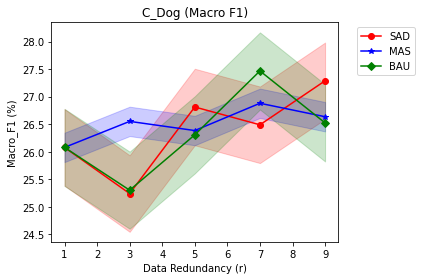

In [2]:


plt.plot(np.array(dataRed),np.array(m_f1_SAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(m_f1_MAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(m_f1_BAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(m_f1_SAD-np.std(m_f1_SAD)),np.array(m_f1_SAD+np.std(m_f1_SAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(m_f1_MAS-np.std(m_f1_MAS)),np.array(m_f1_MAS+np.std(m_f1_MAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(m_f1_BAU-np.std(m_f1_BAU)),np.array(m_f1_BAU+np.std(m_f1_BAU)),alpha=0.2,color='g')


plt.title("C_Dog (Macro F1)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("Macro_F1 (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('C_Dog(Macro_F1).png')
plt.show()





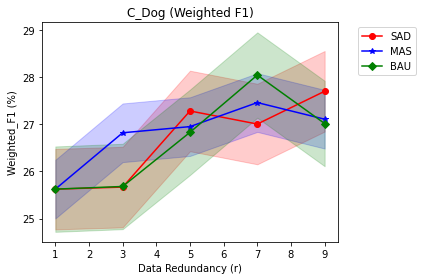

In [3]:



plt.plot(np.array(dataRed),np.array(w_f1_SAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(w_f1_MAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(w_f1_BAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(w_f1_SAD-np.std(w_f1_SAD)),np.array(w_f1_SAD+np.std(w_f1_SAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(w_f1_MAS-np.std(w_f1_MAS)),np.array(w_f1_MAS+np.std(w_f1_MAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(w_f1_BAU-np.std(w_f1_BAU)),np.array(w_f1_BAU+np.std(w_f1_BAU)),alpha=0.2,color='g')


plt.title("C_Dog (Weighted F1)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("Weighted_F1 (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('C_Dog(Weighted_F1).png')
plt.show()




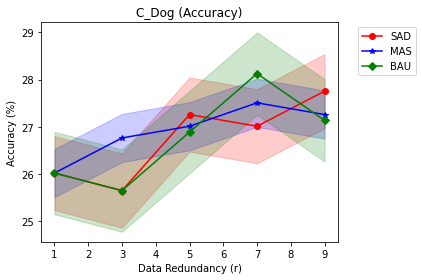

In [4]:


plt.plot(np.array(dataRed),np.array(accSAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(accMAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(accBAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(accSAD-np.std(accSAD)),np.array(accSAD+np.std(accSAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(accMAS-np.std(accMAS)),np.array(accMAS+np.std(accMAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(accBAU-np.std(accBAU)),np.array(accBAU+np.std(accBAU)),alpha=0.2,color='g')


plt.title("C_Dog (Accuracy)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("Accuracy (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('C_Dog(Accuracy).png')
plt.show()









